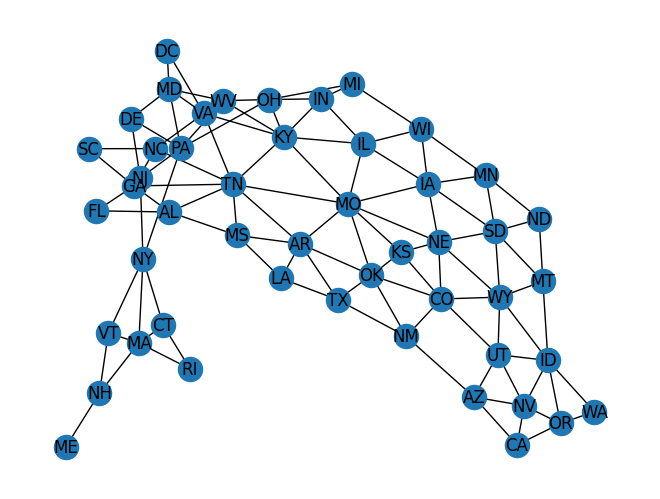

In [54]:
# importing necessary packages and intializing graph object
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# reading data into networkx graph object
usa = open('contiguous-usa.dat')
for line in usa:
    s1, s2 = line.strip().split()
    G.add_edge(s1, s2)
    
# visualizing the graph
nx.draw(G, with_labels=True)
plt.show()


In [55]:
# encoding the demands to each state
for state in G.nodes():
    if state != 'CA':
        G.nodes[state]['demand'] = 1
G.nodes['CA']['demand'] = -48



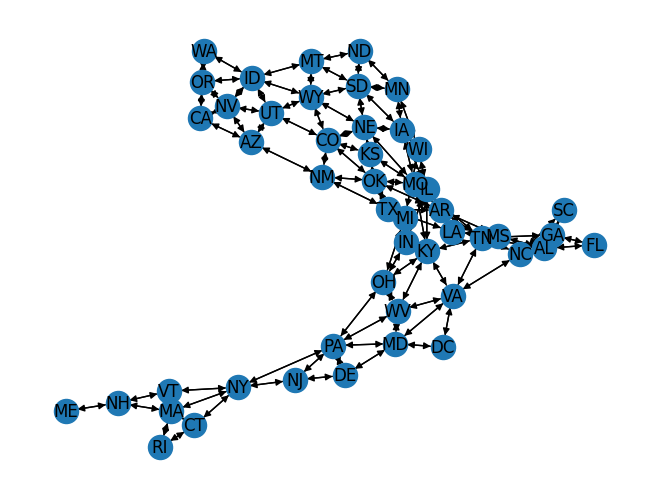

In [56]:
# assigning capacities to each edge in the graph
G = nx.DiGraph(G)
# since CA is connected to only 3 states, we set the uniform capacity to 16
uniform_capacity = 16
for (s1, s2) in G.edges():
    G.edges[s1,s2]['capacity'] = uniform_capacity
    
# visualizing the graph
nx.draw(G, with_labels=True)
plt.show()

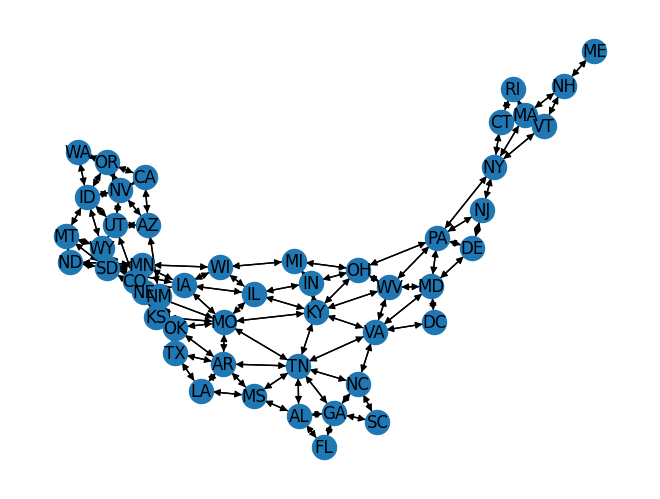

In [57]:

def flow_with_demands(graph):
    graph.add_node('Source')
    graph.add_node('Sink')

    total_demand = 0
    total_supply = 0
    for state in graph.nodes():
        if state == 'Source' or state == 'Sink':
            continue
        elif graph.nodes[state]['demand'] > 0:
            total_demand += graph.nodes[state]['demand']
            graph.add_edge(state, 'Sink', capacity=graph.nodes[state]['demand'])
        elif graph.nodes[state]['demand'] < 0:
            total_supply += graph.nodes[state]['demand']
            graph.add_edge('Source', state, capacity=abs(graph.nodes[state]['demand']))

    if total_demand + total_supply != 0:
        raise nx.NetworkXUnfeasible("No flow satisfies the demands")

    flow_value, flow_dict = nx.maximum_flow(graph, 'Source', 'Sink')

    if flow_value != total_demand:
        raise nx.NetworkXUnfeasible("No flow satisfies the demands")

    del flow_dict['Source']
    del flow_dict['Sink']

    for key, value in flow_dict.items():
        if 'Sink' in value:
            del flow_dict[key]['Sink']
        elif 'Source' in value:
            del flow_dict[key]['Source']

    for state in graph.nodes():
        if state == 'Source' or state == 'Sink':
            continue
        elif graph.nodes[state]['demand'] > 0:
            graph.remove_edge(state, 'Sink')
        elif graph.nodes[state]['demand'] < 0:
            graph.remove_edge('Source', state)

    graph.remove_node('Source')
    graph.remove_node('Sink')

    return flow_dict

# visualizing the graph
nx.draw(G, with_labels=True)
plt.show()


In [58]:
# computes the flow into each node according to the given dictionary and output the resultant net flow as a dictionary
def divergence(flow):
    net_flow = {}
    state_outflow = {}
    state_inflow = {}
    for state in flow:
        adj = flow.get(state)
        state_outflow[state] = sum(adj.values())
        for key, value in adj.items():
            if key not in state_inflow:
                state_inflow[key] = value
            else:
                state_inflow[key] += value
    
    for key, value in state_inflow.items():
        net_flow[key] = value - state_outflow[key]
    
    return net_flow



Flow satisfies all demands: True


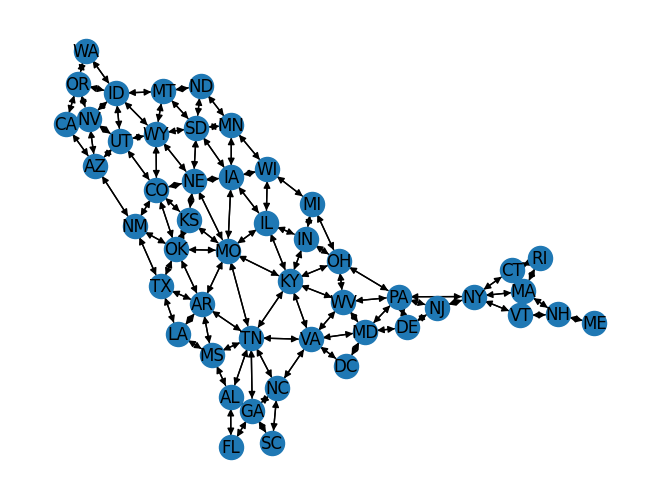

In [59]:
# sanity check
flow = flow_with_demands(G)
div = divergence(flow)
print("Flow satisfies all demands:", all(div[n] == G.nodes[n]['demand'] for n in G.nodes()))

# visualizing the graph
nx.draw(G, with_labels=True)
plt.show()
